In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
traindf = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
testdf = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
testdf.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200




**Univariate Analysis**
* Numerical Variables:  Age, Fare, PassengerId
* Categorical Variables: Survived, Pclass, Sex, SibSp, Parch, Embarked
* Mixed:  Name, Ticket, Cabin

In [8]:
traindf.shape

(891, 12)

**Age**

**Conclusions**
* Age is almost Normally Distributed
* 20 % of the values are missing
* Most of the people has Age between 18 to 38



(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

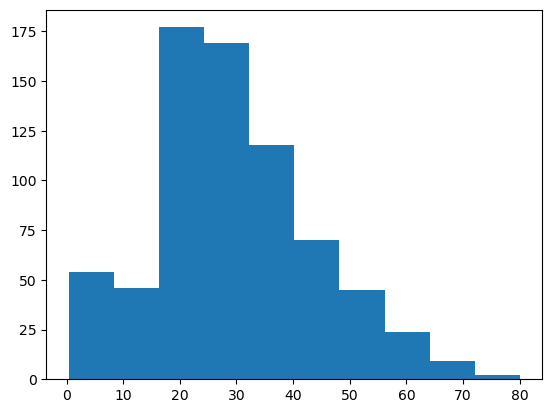

In [9]:
plt.hist(traindf['Age'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

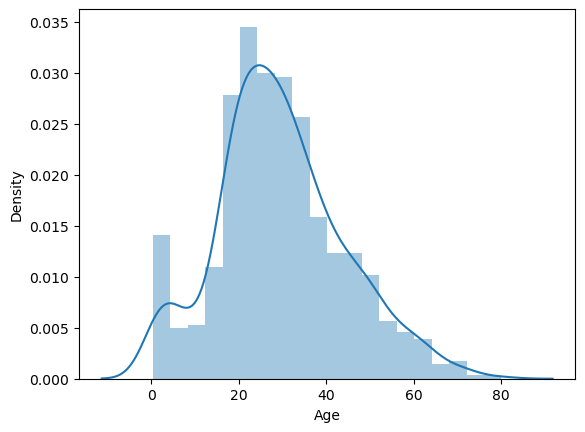

In [10]:
sns.distplot(traindf['Age'])

<AxesSubplot:>

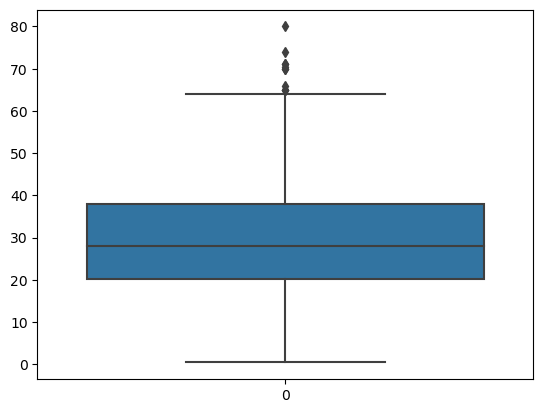

In [11]:
sns.boxplot(traindf['Age'])

<AxesSubplot:>

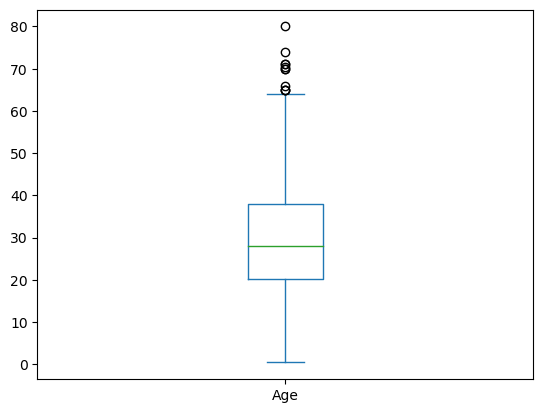

In [12]:
traindf['Age'].plot(kind='box')

In [13]:
traindf[traindf['Age'] > 65]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [14]:
traindf['Age'].isnull().sum()

177

In [15]:
traindf['Age'].skew()

0.38910778230082704

**Fare**

**Conclusions**
* Data is Highly (positively) Skewed
* Fare Column contains the group fare not the individual fare (This might be an issue) 
* We meed to create another column called individual fare
* More of the Passengers has paid Fare less then 31



In [16]:
traindf['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

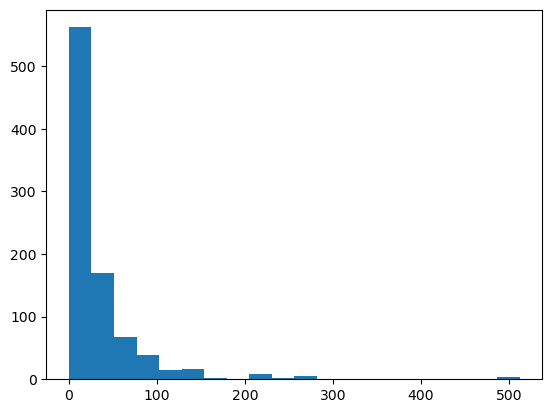

In [17]:
plt.hist(traindf['Fare'], 20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Fare', ylabel='Density'>

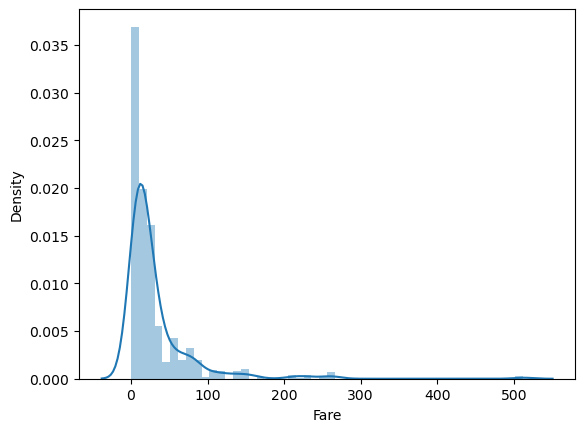

In [18]:
sns.distplot(traindf['Fare'])

<AxesSubplot:ylabel='Density'>

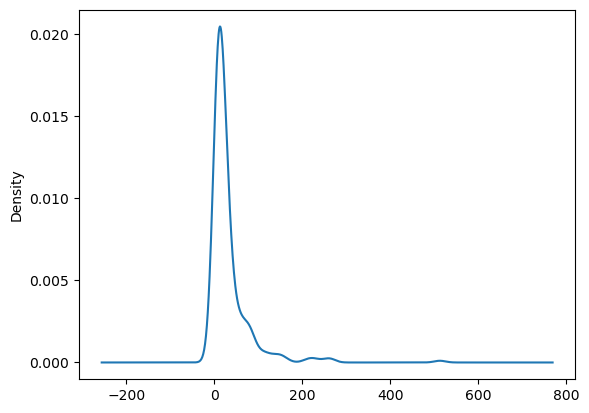

In [19]:
traindf['Fare'].plot(kind='kde')

In [20]:
traindf['Fare'].skew()

4.787316519674893

<AxesSubplot:>

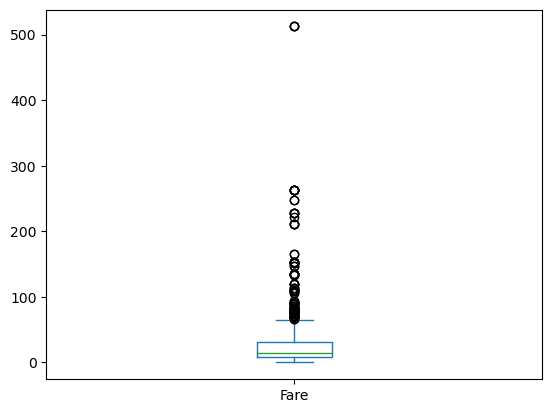

In [21]:
traindf['Fare'].plot(kind='box')

In [22]:
traindf['Fare'].isnull().sum()

0

**Survived**

* 61% People were Survived & 39 % People were not Survived

In [23]:
traindf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

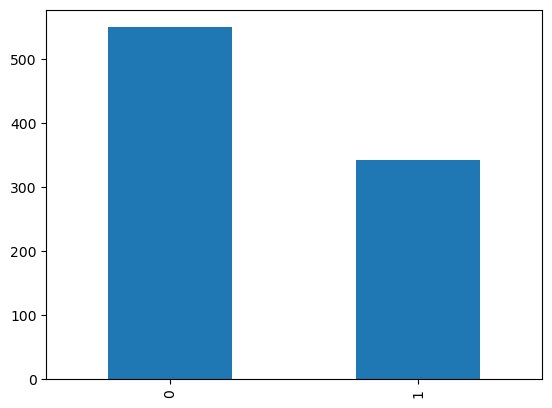

In [24]:
traindf['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Survived'>

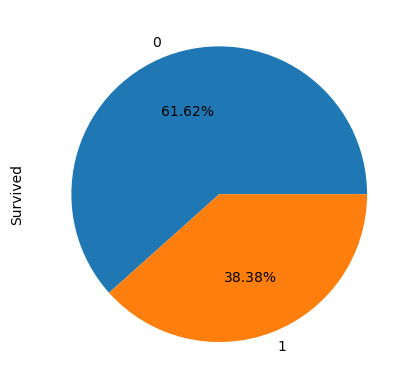

In [25]:
traindf['Survived'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [26]:
traindf['Survived'].isnull().sum()

0

**Sex**

* 64% People are Male & 36 % People are Female

In [27]:
traindf['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

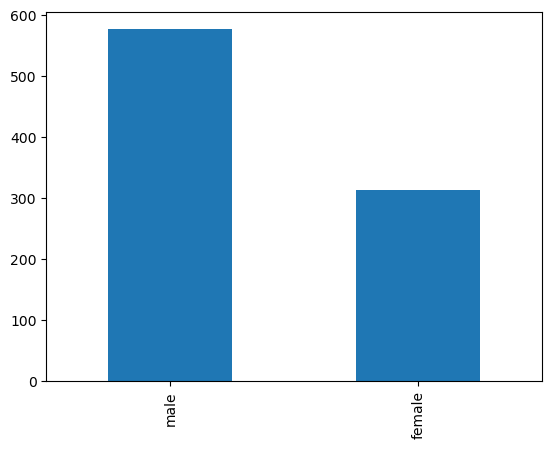

In [28]:
traindf['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Sex'>

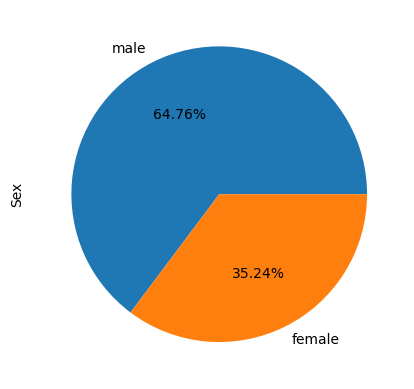

In [29]:
traindf['Sex'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [30]:
traindf['Sex'].isnull().sum()

0

**Pclass**

* 55% of the people travelled in Pclass 3. (may be coz of low price)
* 24% of the people travelled in Pclass 1 & Remaining 20 % travelled in Pclass 2
* According to Data the No of People Travelled shows that Pclass=3 > Pclass=1 > Pclass=2
* This concludes that Pclass=3 was the cheapest & there may be very slight difference in the price of Pclass=2 & Pclass=1 due to most of the people preferred to travel in Pclass=1 instead of Pclass=2

In [31]:
traindf['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

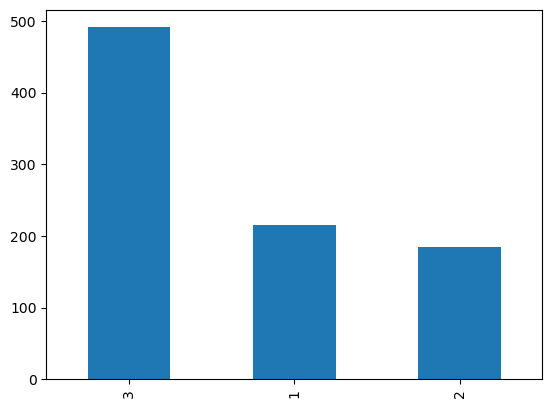

In [32]:
traindf['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Pclass'>

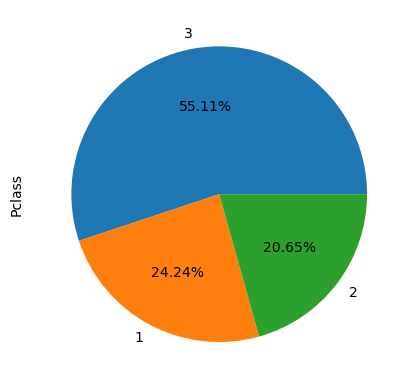

In [33]:
traindf['Pclass'].value_counts().plot(kind='pie', autopct='%0.2f%%')

**Embarked**

* 72% Embark from Southampton
* 16% Embark from Cherbourg
* 8% Embark from Queenstown

<AxesSubplot:>

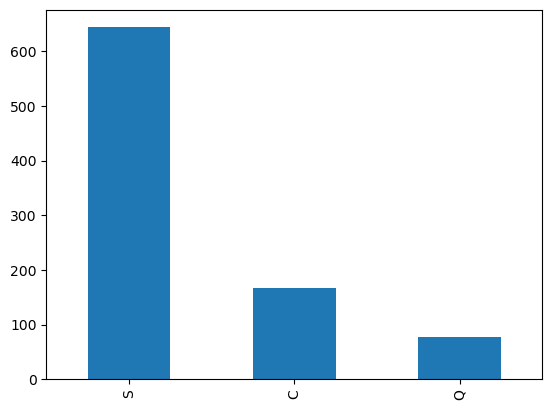

In [34]:
traindf['Embarked'].value_counts().plot(kind='bar')


<AxesSubplot:ylabel='Embarked'>

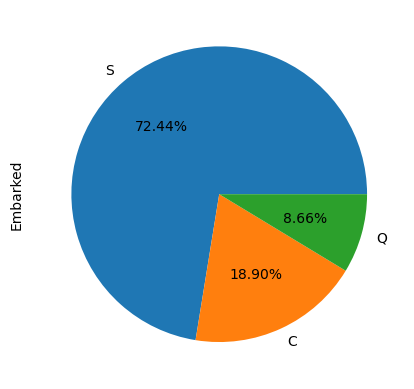

In [35]:
traindf['Embarked'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [36]:
traindf[traindf['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [37]:
traindf['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [38]:
traindf['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:ylabel='SibSp'>

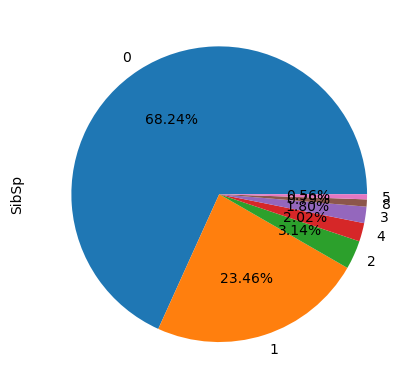

In [39]:
traindf['SibSp'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [40]:
traindf['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [41]:
traindf['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:ylabel='Parch'>

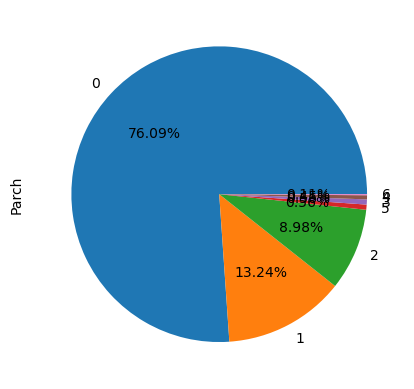

In [42]:
traindf['Parch'].value_counts().plot(kind='pie', autopct='%0.2f%%')